In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from typing import Union, List
import joblib
import imblearn
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib as plt
from sklearn import metrics

#warnings.filterwarnings(action='ignore')

## load data

In [2]:
df = pd.read_csv('final_train.csv')

In [3]:
#df = p.get_df()
print(df.shape)
df

(1131682, 34)


,Unnamed: 0,loan_amnt,term,int_rate,installment,sub_grade,emp_length,verification_status,loan_status,delinq_2yrs,...,debt_consolidation,essential_purpose,optional_purpose,fico_avg,annual_inc_log,delinq_amnt_log,dti_log,num_rev_tl_bal_gt_0_log,revol_bal_log,tot_cur_bal_log
0,0,6000.0,36,7.97,187.94,4,2,True,0,1.0,...,True,False,False,757.0,10.714440,0.0,2.269028,0.693147,8.036250,10.820878
1,1,23200.0,60,24.99,680.82,23,10,True,1,1.0,...,True,False,False,672.0,11.608245,0.0,3.575151,2.397895,9.735660,13.315176
2,2,16000.0,36,7.07,494.55,1,10,False,1,0.0,...,False,False,True,822.0,11.082158,0.0,2.930660,1.945910,8.264106,11.522113
3,3,4500.0,36,10.42,146.10,7,5,False,0,0.0,...,False,False,True,702.0,10.819798,0.0,2.078191,1.386294,8.828348,12.178635
4,4,20000.0,36,9.99,645.25,7,10,True,0,0.0,...,False,False,False,677.0,11.002117,0.0,3.399195,2.397895,9.718783,11.831590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,1131677,26500.0,60,17.27,662.45,14,2,True,0,0.0,...,True,False,False,697.0,11.002117,0.0,3.045474,1.945910,10.118720,12.346938
1131678,1131678,3600.0,36,19.99,133.78,20,7,False,1,0.0,...,True,False,False,667.0,10.428246,0.0,3.004692,1.945910,9.181118,11.195760
1131679,1131679,19000.0,36,6.68,583.89,2,4,False,0,0.0,...,True,False,False,737.0,11.170449,0.0,3.215671,1.609438,9.343297,12.388636
1131680,1131680,9600.0,36,14.33,329.65,10,9,True,0,0.0,...,True,False,False,692.0,10.691968,0.0,2.628285,1.791759,8.836665,11.884551


In [4]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [5]:
scaled_df

,Unnamed: 0,loan_amnt,term,int_rate,installment,sub_grade,emp_length,verification_status,loan_status,delinq_2yrs,...,debt_consolidation,essential_purpose,optional_purpose,fico_avg,annual_inc_log,delinq_amnt_log,dti_log,num_rev_tl_bal_gt_0_log,revol_bal_log,tot_cur_bal_log
0,0.000000e+00,0.139241,0.0,0.103583,0.105319,0.117647,0.2,1.0,0.0,0.02381,...,1.0,0.0,0.0,0.512129,0.578659,0.0,0.328475,0.165443,0.544497,0.697662
1,8.836412e-07,0.574684,1.0,0.766355,0.393180,0.676471,1.0,1.0,1.0,0.02381,...,1.0,0.0,0.0,0.053908,0.626931,0.0,0.517556,0.572337,0.659641,0.858478
2,1.767282e-06,0.392405,0.0,0.068536,0.284391,0.029412,1.0,0.0,1.0,0.00000,...,0.0,0.0,1.0,0.862534,0.598518,0.0,0.424257,0.464456,0.559936,0.742873
3,2.650924e-06,0.101266,0.0,0.198988,0.080883,0.205882,0.5,0.0,0.0,0.00000,...,0.0,0.0,1.0,0.215633,0.584349,0.0,0.300849,0.330885,0.598166,0.785201
4,3.534565e-06,0.493671,0.0,0.182243,0.372405,0.205882,1.0,1.0,0.0,0.00000,...,0.0,0.0,0.0,0.080863,0.594195,0.0,0.492084,0.572337,0.658498,0.762826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,9.999965e-01,0.658228,1.0,0.465732,0.382451,0.411765,0.2,1.0,0.0,0.00000,...,1.0,0.0,0.0,0.188679,0.594195,0.0,0.440878,0.464456,0.685595,0.796052
1131678,9.999973e-01,0.078481,0.0,0.571651,0.073688,0.588235,0.7,0.0,1.0,0.00000,...,1.0,0.0,0.0,0.026954,0.563202,0.0,0.434974,0.464456,0.622068,0.721832
1131679,9.999982e-01,0.468354,0.0,0.053349,0.336569,0.058824,0.4,0.0,0.0,0.00000,...,1.0,0.0,0.0,0.404313,0.603287,0.0,0.465516,0.384146,0.633056,0.798741
1131680,9.999991e-01,0.230380,0.0,0.351246,0.188083,0.294118,0.9,1.0,0.0,0.00000,...,1.0,0.0,0.0,0.161725,0.577445,0.0,0.380483,0.427663,0.598730,0.766240


## Design Matrix

In [6]:
df_X = scaled_df.drop(columns=['loan_status', 'Unnamed: 0'])
df_y = scaled_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 30)

In [7]:
#smote oversample
smote = SMOTE(random_state = 30)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
ss = pd.DataFrame(X_train)
ss

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,verification_status,delinq_2yrs,inq_last_6mths,pub_rec,...,debt_consolidation,essential_purpose,optional_purpose,fico_avg,annual_inc_log,delinq_amnt_log,dti_log,num_rev_tl_bal_gt_0_log,revol_bal_log,tot_cur_bal_log
0,0.492405,1.0,0.553349,0.301147,0.647059,1.000000,1.0,0.000000,0.000,0.000000,...,1.0,0.0,0.0,0.161725,0.584349,0.0,0.448784,0.330885,0.528751,0.686263
1,0.291139,0.0,0.150312,0.218979,0.176471,0.000000,0.0,0.000000,0.125,0.000000,...,1.0,0.0,0.0,0.188679,0.606247,0.0,0.420421,0.384146,0.587698,0.622734
2,0.367089,0.0,0.496495,0.312536,0.470588,0.000000,1.0,0.000000,0.000,0.000000,...,1.0,0.0,0.0,0.107817,0.598518,0.0,0.363772,0.165443,0.512551,0.861628
3,0.240506,0.0,0.079439,0.176829,0.088235,0.700000,1.0,0.000000,0.125,0.000000,...,0.0,0.0,0.0,0.215633,0.595088,0.0,0.213494,0.496328,0.554732,0.527865
4,0.406962,0.0,0.454829,0.340645,0.500000,0.700000,1.0,0.000000,0.000,0.000000,...,1.0,0.0,0.0,0.161725,0.580178,0.0,0.506390,0.330885,0.665642,0.698497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444681,0.350025,1.0,0.552818,0.214728,0.572738,1.000000,1.0,0.000000,0.000,0.006127,...,1.0,0.0,0.0,0.202882,0.596841,0.0,0.427686,0.570176,0.613171,0.662111
1444682,0.367381,0.0,0.114367,0.271296,0.147059,0.698844,0.0,0.000275,0.000,0.011561,...,0.0,0.0,0.0,0.080707,0.625375,0.0,0.385451,0.262617,0.626562,0.734407
1444683,0.212164,0.0,0.342145,0.173231,0.323529,0.400000,0.0,0.000000,0.000,0.000000,...,1.0,0.0,0.0,0.023733,0.563894,0.0,0.349285,0.330885,0.563904,0.660234
1444684,0.208796,0.0,0.107697,0.155004,0.105902,0.230034,1.0,0.000000,0.250,0.000000,...,0.0,0.0,0.0,0.442030,0.554169,0.0,0.371330,0.318460,0.625258,0.620000


## Fitting

In [10]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

         0.0       0.89      0.37      0.52    180654
         1.0       0.25      0.81      0.38     45683

    accuracy                           0.46    226337
   macro avg       0.57      0.59      0.45    226337
weighted avg       0.76      0.46      0.49    226337



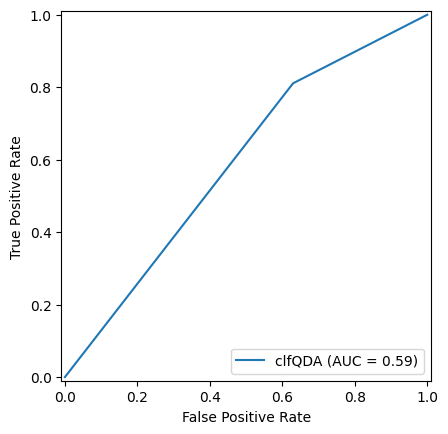

In [11]:
clfQDA = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = clfQDA.predict(X_test)
joblib.dump(clfQDA, 'clfQDA_4.pkl')
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfQDA')
display.plot()

## RidgeClassifier

In [10]:
clfRidge = RidgeClassifierCV().fit(X_train, y_train)

In [11]:
y_pred = clfRidge.predict(X_test)
joblib.dump(clfRidge, 'clfRidge_4.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.64      0.43     45683

    accuracy                           0.65    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.65      0.69    226337



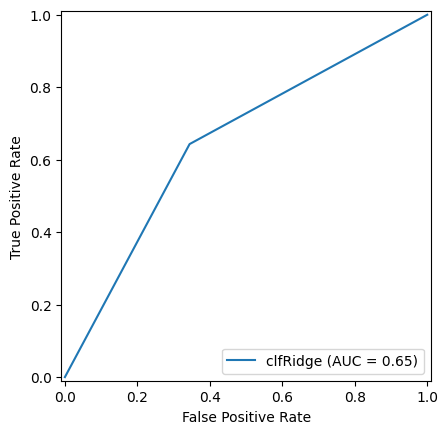

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfRidge')
display.plot()

## LassoClassifier

In [13]:
clfLasso = LogisticRegressionCV(penalty='l1', solver = 'saga').fit(X_train, y_train)

In [14]:
y_pred = clfLasso.predict(X_test)
joblib.dump(clfLasso, 'clfLasso_4.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.64      0.43     45683

    accuracy                           0.65    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.77      0.65      0.69    226337



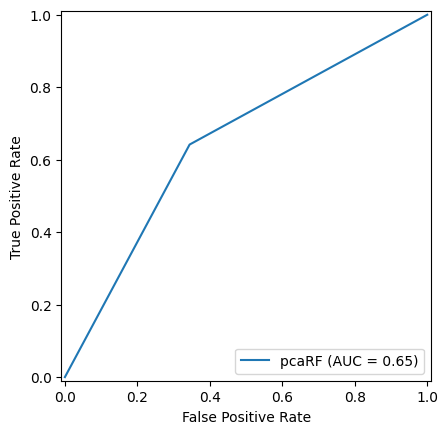

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()

## Random Forest

In [15]:
clfRF = RandomForestClassifier(max_depth = 30, random_state = 30)
clfRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=30)

In [16]:
pred = clfRF.predict(X_test)
joblib.dump(clfRF, 'clfRF_4.pkl')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87    180654
         1.0       0.43      0.21      0.28     45683

    accuracy                           0.78    226337
   macro avg       0.63      0.57      0.58    226337
weighted avg       0.74      0.78      0.75    226337



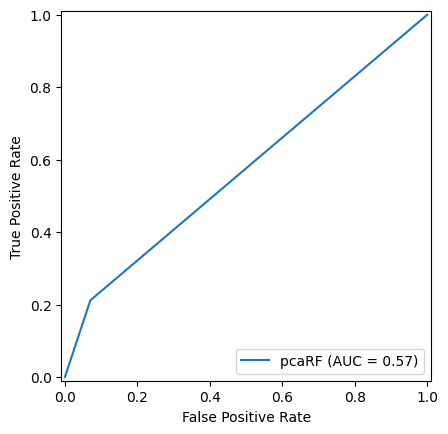

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()

## xgBoost

In [18]:
clfXGB = XGBClassifier(random_state = 30, max_depth = 30)
clfXGB.fit(X_train, y_train)
clfXGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [19]:
pred = clfXGB.predict(X_test)
joblib.dump(clfXGB, 'clfXGB_4.pkl')
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88    180654
         1.0       0.44      0.15      0.23     45683

    accuracy                           0.79    226337
   macro avg       0.63      0.55      0.55    226337
weighted avg       0.74      0.79      0.75    226337



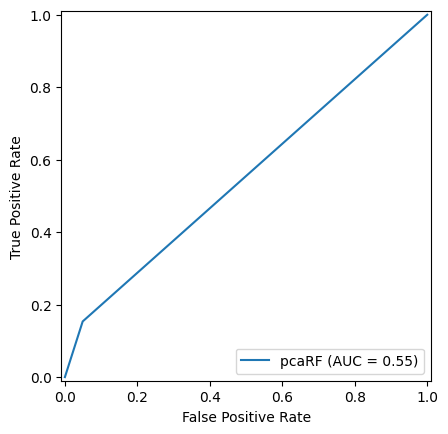

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='pcaRF')
display.plot()

## SVM 

In [12]:
from sklearn.svm import SVC

In [13]:
clfSVM = SVC(C=1e10, random_state=30).fit(X_train, y_train)

In [ ]:
y_pred = pcaSVM.predict(X_test)
joblib.dump(pcaSVM, 'pcaSVM_3.pkl')
print(classification_report(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='SVM_3')
display.plot()